# Loan Approval Prediction

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
%matplotlib inline
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
#Checking dataset's Shape
df = pd.read_csv('Loan_Train.csv')
df.shape

(614, 13)

In [3]:
#First 5 rows of data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Statistical information about data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Checking unique values in each feature
df.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
#Checking null values in data, if any
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Loan_ID as index and then dropping it
df.index = df['Loan_ID']
df = df.drop(columns='Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

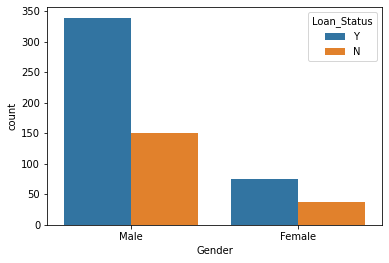

In [9]:
sns.countplot(x=df['Gender'], data=df, hue='Loan_Status')

- **There are more Men than Women. (Approx. 3x)**

<AxesSubplot:xlabel='Married', ylabel='count'>

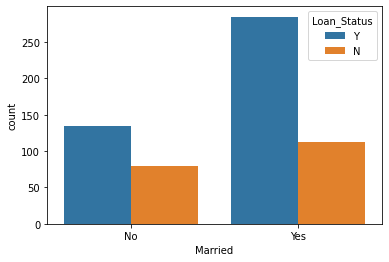

In [10]:
sns.countplot(x=df['Married'], data=df, hue='Loan_Status')

- **2/3rd of the population in the dataset is Married and Married applicants are more likely to be granted loans.**

<AxesSubplot:xlabel='Dependents', ylabel='count'>

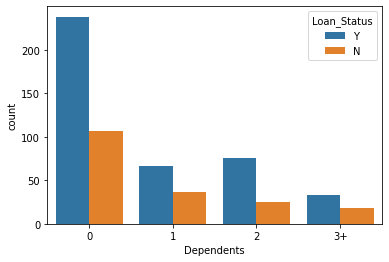

In [11]:
sns.countplot(x=df['Dependents'], data=df, hue='Loan_Status')

- **Majority of the population have 0 dependents and are also likely to accepted for loan.**

<AxesSubplot:xlabel='Education', ylabel='count'>

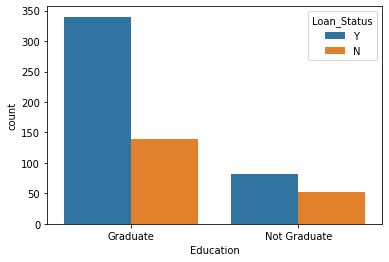

In [12]:
sns.countplot(x=df['Education'], data=df, hue='Loan_Status')

- **Nearly 5/6th population is graduate and are more likey to be approved for loan**

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

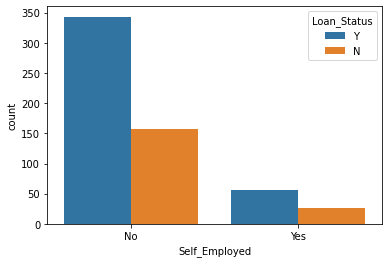

In [13]:
sns.countplot(x=df['Self_Employed'], data=df, hue='Loan_Status')

- **5/6th of the population is not self-employed.**

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

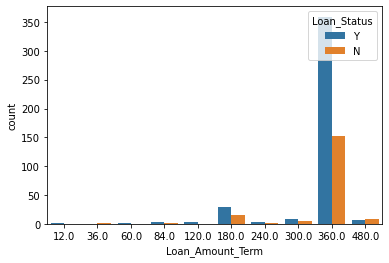

In [14]:
sns.countplot(x=df['Loan_Amount_Term'], data=df, hue='Loan_Status')

- **Majority of the loans are taken for 360 Months.(30 Years)**

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

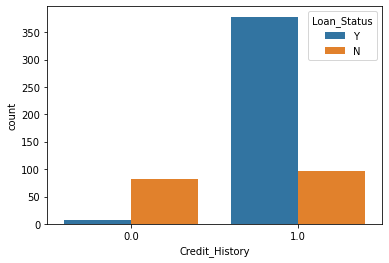

In [15]:
sns.countplot(x=df['Credit_History'], data=df, hue='Loan_Status')

- **Applicants with credit history are more likely to be approved.**

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

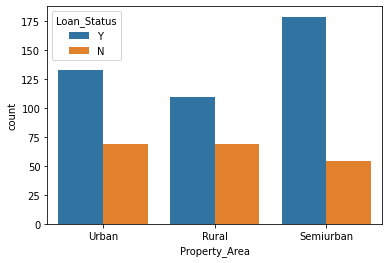

In [16]:
sns.countplot(x=df['Property_Area'], data=df, hue='Loan_Status')

- **More applicants from Semi-urban and also more likely to be granted loans**

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

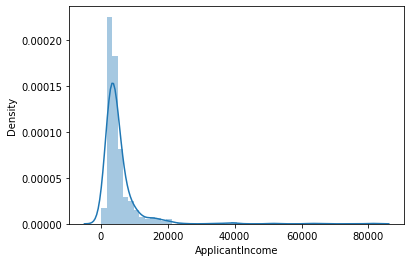

In [17]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

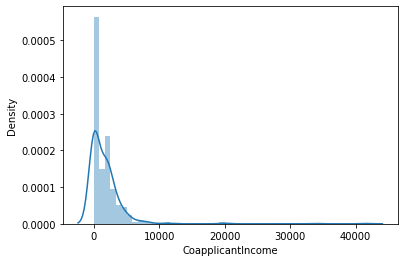

In [18]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

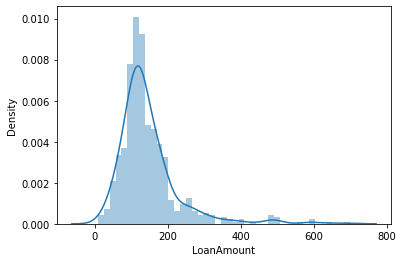

In [19]:
sns.distplot(df['LoanAmount'])

- **Other than the skewedness of numerical data, there is nothing much to correlate the data in numerical features.**

## Preprocessing

In [20]:
#Encoding categorical values to numerical
df_new = pd.get_dummies(df, drop_first=True)
df_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,
LP001002,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [21]:
X = df_new.drop(columns = 'Loan_Status_Y')
y = df_new['Loan_Status_Y']

In [22]:
#Splitting then data in Training and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [23]:
#Filling missing values using SingleImpute (Mean)
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

## Training the model

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test_imp)

## Evaluation

In [26]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Accuracy:  0.8536585365853658
F1 Score:  0.903225806451613


## Tuning the Threshold

In [27]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

In [28]:
#Sweeping from 0.1 threshold to 0.9 threshold
for thresh in np.arange(0.1,0.9,0.1):
    modelX = LogisticRegression(solver='liblinear')
    modelX.fit(X_train, y_train)
    
    y_pred_train_thresh = modelX.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)
    
    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    y_pred_test_thresh = modelX.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

In [29]:
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

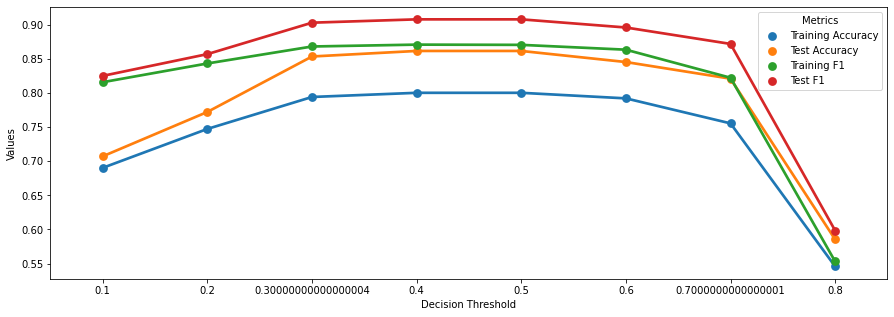

In [30]:
#Plotting different metrics according to threshold
plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

- **Here we can see the threshold at 0.4 is optimum for our model.**

In [31]:
#from the graph, threshold = 0.4
thresh = 0.4
y_pred_test_thresh = modelX.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 

In [32]:
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082


In [33]:
print("Confusion Matrix on Test Data")
cnf = confusion_matrix(y_test, y_pred)
cnf

Confusion Matrix on Test Data


array([[22, 16],
       [ 1, 84]], dtype=int64)

Confusion Matrix on Test Data Plot


<AxesSubplot:>

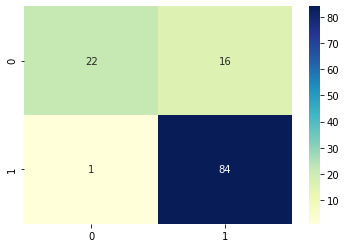

In [34]:
print("Confusion Matrix on Test Data Plot")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')